## Turnover and Turmoil—Blood Cell Populations

Blood is composed of ﬂuid, called plasma, and blood cells

The following are major types of blood cells:

1. Red blood cells, which are for oxygen transport from the lungs to tissues
2. White blood cells, which are part of the body’s defense mechanism against infections
3. Platelets, which help the blood to clot

The production of new blood cells of a particular type depends on the number of blood cells of that type.
The number of blood cells destroyed also depends on the number of blood cells of that type.  



definition:

x&emsp;&emsp;&ensp;&nbsp;= the number of blood cells  
$x_{i}$&emsp;&emsp;&nbsp;= the number of such blood cells at time $t_{i}$  
p($x_{i}$)&emsp;= the number of such blood cells produced (the production rate)  
d($x_{i}$)&emsp;= number of such blood cells destroyed (the destruction rate)

### Model Parameters

mengacu pada hasil penelitian Gearhart and Martelli (1990):  
it takes about 6 days for red blood cells to reach maturity, while in a healthy person about 2.3% of the cells are destroyed per day.

the destruction function:  
\begin{align*} 
d(x_i) &= 0.14x_i
\end{align*}

mengacu pada hasil penelitian Lasota (1977)

the production function:  

\begin{align*}
p(x) &= bx^2e^\frac{-sx}{r}
\end{align*}

mengacu pada hasil penelitian Gearhart and Martelli (1990):

konstanta dari fungsi produksi mengacu pada:  
• Normal red-cell count ≈ 3.3 × $10^{11}$ cells/kg  
• Maximum red-cell production ≈ 10 times the steady-state production rate  
• For a red-cell population of 75% of the steady-state level (count)  
• red-cell production ≈ five times steady-state level

maka pada kondisi tertentu terdapat kondisi steady-state level


\begin{align*} 
v &= 3.3 x 10^{11} cells/kg\\
p(v)&=d(v)\\
d(v)&=0.14(v)\\
p(v)&=4.62 × 10^{10} cells/kg
\end{align*}



### Project 1

Develop a model for a red blood cell population using the following production function, which is a variation of Equation 3: $p(x) = bv(x/v)^se^{-sx/(vr)}$, where v is the normal red-cell count, b = 1.1 × $10^6$, s = 8, and r = 0.5 (Gearhart and Martelli 1990). Account for the (approximate) 6-day maturation of cells, perhaps using a conveyor; and determine reasonable constants by referring to the “Model Parameters” section. Graph blood cells per kilogram, blood cells produced per kilogram, and blood cells destroyed per kilogram versus time.

Discuss your results Find analytically where the maximum occurs and the maximum for the production function in Equation 3, and verify that your model approximately agrees with this value.

For r = 3, b = 50, s = 5, and c = 0.5, what is the period?

fungsi produksi:  

\begin{align*}
p(x) &= bv\big(\frac{x}{v}\big)^se^\frac{-sx}{vr}\\
\end{align*}

dengan nilai konstanta adalah  

\begin{align*}
v &= 3.3 x 10^{11} cells/kg\\
b &= 1.1 × 10^6\\
s &= 8\\
r &= 0.5\
\end{align*}



# Code

### Library

In [10]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from scipy import fftpack

#### production function

In [11]:
def pro(v,s,r,b,x):
    p = b*v*((x/v)**s)*np.exp(-s*x/(v*r))
    return(p)

In [12]:
def pros(s,r,b,x):
    p = b*(x**s)*np.exp(-s*x/r)
    return(p)

#### variable tipe 1

In [13]:
N = 50
v = 3.3e11
# s = 7.5
s = 8
r = 0.5
b = 1.1e6
# b = 0.8e6
c = 0.14
x = np.zeros((N))
x[0] = v
p = np.zeros((N))
p[0] = 0
d = np.zeros((N))
d[0] = 0

for t in range(0,N-1):
    p[t] = pro(v,s,r,b,x[t])
#     p[t] = pros(s,r,b,x[t])
    d[t] = c*x[t]
    x[t+1] = x[t] - d[t] + p[t-1]

#### plot dengan fungsi produksi dan variable tipe 1

<IPython.core.display.Javascript object>


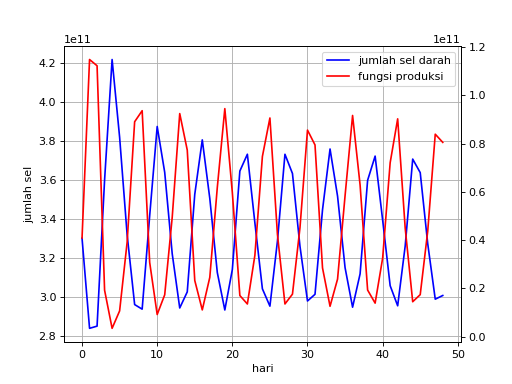

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(x[0:N-1],'b-',label='jumlah sel darah')
ax2 = ax1.twinx()
ax2.plot(p[0:N-1], 'r-',label='fungsi produksi')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax1.set_xlabel("hari")
ax1.set_ylabel(r"jumlah sel")
ax1.grid()
plt.show()

### plot x vs p(x)

Find analytically where the maximum occurs and the maximum for the production function

<IPython.core.display.Javascript object>


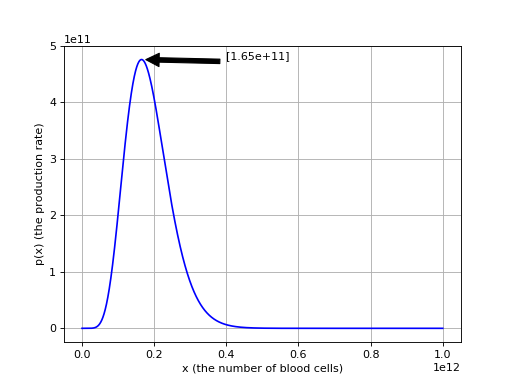

In [7]:
N = 1e12
v = 3.3e11
s = 8
r = 0.5
b = 1.1e6
i = np.zeros((int(N/1000000)))
px = np.zeros((int(N/1000000)))
n = 0

for t in range(0,int(N),1000000):
    px[n] = pro(v,s,r,b,t)
    i[n] = t
    n = n+1

fig, ax1 = plt.subplots()
ax1.plot(i,px,'b-')

ax1.set_xlabel("x (the number of blood cells)")
ax1.set_ylabel("p(x) (the production rate)")
ax1.annotate(str(i[np.where(px==max(px))]), xy=(i[np.where(px==max(px))], px[np.where(px==max(px))]),
            xytext=(0.4e12, px[np.where(px==max(px))]+10000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax1.grid()
plt.show()

In [15]:
print("maksimum p(x) berada pada x\t:",end="")
print(i[np.where(px==max(px))])
print("maksimum p(x) \t\t\t:",end="")
print(px[np.where(px==max(px))])
print(r*v)

maksimum p(x) berada pada x	:[1.65e+11]
maksimum p(x) 			:[4.75675523e+11]
165000000000.0


fungsi produksi:  

\begin{align*}
p(x) &= bx^2e^\frac{-sx}{r}
\end{align*}

#### variable tipe 2

In [139]:
N = 100
v = 3.3e11
s = 5
r = 3
b = 50
c = 0.5
x = np.zeros((N))
x[0] = v
p = np.zeros((N))
p[0] = 0
d = np.zeros((N))
d[0] = 0

for t in range(0,N-1):
    p[t] = pro(v,s,r,b,x[t])
    d[t] = c*x[t]
    x[t+1] = x[t] - d[t] + p[t-1]

#### menghitung periode

In [15]:
Y=fft(x)

n=len(Y)
#power = FFT signal squared
power = abs(Y[1:int(n/2)])**2
#We only need the part of the signal ranging from zero to a frequency equal to the Nyquist frequency,
#which is equal to half the maximum frequency, 
#since frequencies above the Nyquist frequency correspond to negative frequencies
nyquist=1./2
freq=array(range(int(n/2)))/int((n/2.0))*nyquist
period=1./freq

D:\program\python\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


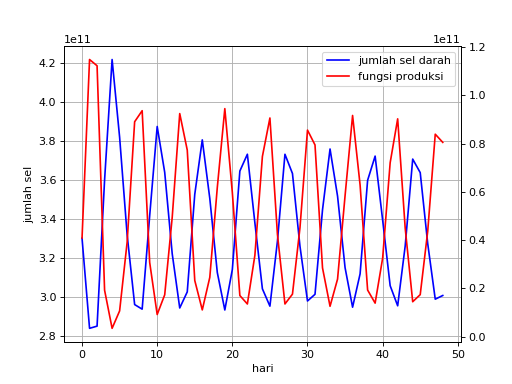

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(x[0:N-1],'b-',label='jumlah sel darah')
ax2 = ax1.twinx()
ax2.plot(p[0:N-1], 'r-',label='fungsi produksi')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1)
ax1.set_xlabel("hari")
ax1.set_ylabel(r"jumlah sel")
ax1.grid()
plt.show()

#### periode vs |FFT|**2

<IPython.core.display.Javascript object>


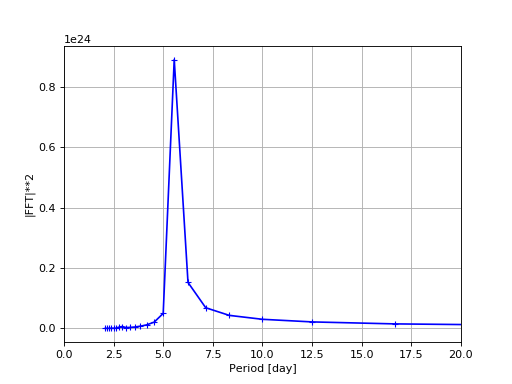

In [17]:
fig2, ax2 = plt.subplots()
ax2.plot(period[1:len(period)], power,'-b+')
plt.xlim(0,20)
plt.xlabel('Period [day]')
plt.ylabel('|FFT|**2')
ax2.grid()
ax2.annotate(str(period[np.where(power==max(power))]), xy=(6.0, 4e25), xytext=(7.5, 3.7e25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

In [124]:
print("periode yang terdeteksi adalah")
print(period[np.where(power==max(power))])

periode yang terdeteksi adalah
[6.06060606]
